In [1]:
# 导入包
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats

In [2]:
# 导入数据
train_data=pd.read_csv("/Users/chixinning/Desktop/kaggle/KaggleMyOwn/Mycode/raw_data/train.csv")

In [3]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train_data.shape

(1460, 81)

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_data.index=train_data["Id"]
train_data.drop("Id", axis=1, inplace=True)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282
/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

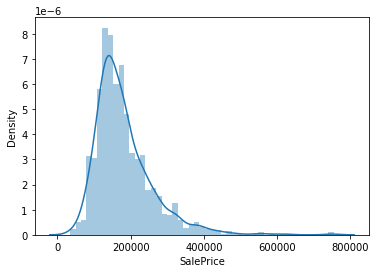

In [8]:
# 通过describe 去看fat-tail
#skewness and kurtosis
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())
#histogram
sns.distplot(train_data['SalePrice'])

In [9]:
# 如何找到categorical和numerical的特征？
numerical = [f for f in train_data.columns if train_data.dtypes[f] != 'object']
numerical.remove('SalePrice')
print("the count of numerical_features: ",len(numerical))
categorical = [f for f in train_data.columns if train_data.dtypes[f] == 'object']
print("the count of categorical_features: ",len(categorical))

the count of numerical_features:  36
the count of categorical_features:  43


In [10]:
print(" numerical features are: ",numerical)

 numerical features are:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [11]:
print(" categorical features are: ",categorical)

 categorical features are:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [12]:
# 缺失值处理
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("how many data has missing value = " + str(sum(missing_data['Total'] >= 1)))

how many data has missing value = 19


In [13]:
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [14]:
categorical_missing=[f for f in missing_data[:19].index if f in categorical]
numerical_missing=[f for f in missing_data[:19].index if f in numerical]

In [15]:
print("numerical_missing are :",numerical_missing)

numerical_missing are : ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']


In [16]:
print("categorical_missing are :",categorical_missing)

categorical_missing are : ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType', 'Electrical']


In [17]:
# 对categorical类型的缺失值填补直接使用fillna("None")
# for f in categorical_missing:
#     train_data[f]=train_data[f].fillna("None")
cols = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
        ,'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC',
        'Fence','MiscFeature','MasVnrType']
for i in cols:
    train_data[i] = train_data[i].fillna('None')
'''
BsmtUnfSF:Unfinished square feet of basement area
BsmtFinSF2:Type 2 finished square feet
BsmtFinSF1: Type 1 finished square feet 
TotalBsmtSF: Total square feet of basement area
表示地下室某种面积，直接填充0.
'''
train_data['BsmtUnfSF'] = train_data['BsmtUnfSF'].fillna(0)
train_data['BsmtFinSF2'] = train_data['BsmtFinSF2'].fillna(0)
train_data['BsmtFinSF1'] = train_data['BsmtFinSF1'].fillna(0)
train_data['TotalBsmtSF'] = train_data['TotalBsmtSF'].fillna(0)

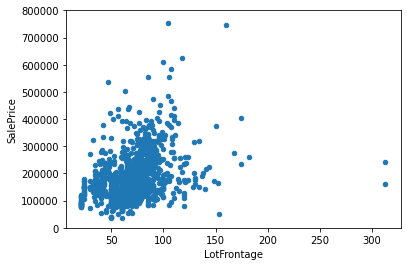

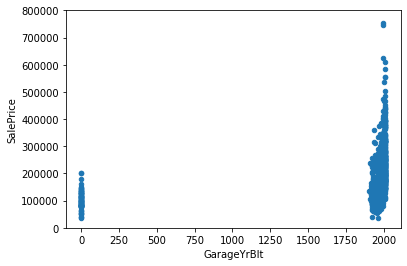

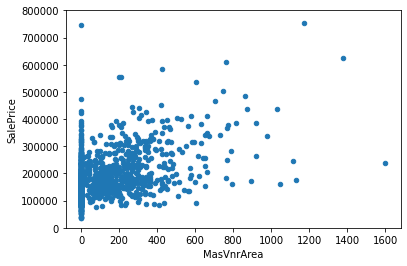

In [18]:
# 对数值型的用median//mode填补
# numerical_missing are : ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
# LotFrontage:Linear feet of street connected to property
# GarageYrBlt:Year garage was built,虽然是数值型的，但是这个值缺失很可能表示并没有车库这种东西
train_data["GarageYrBlt"]=train_data["GarageYrBlt"].fillna(0)
# MasVnrArea:Masonry veneer area in square feet,表示墙面砖的大小，对缺失值用mode/median
# 先分别对三个feature画图可视化，以理解他们各自的含义
for var in numerical_missing:
    data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [19]:
# LotFrontage表示房子临近的街道，参考kaggle上大神的思路：居住在一起的人LotFrontage是相似的，我们将邻居的LotFrontage填充进来；
# Reference:https://zhuanlan.zhihu.com/p/46855142
train_data['LotFrontage'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
# train_data["LotFrontage"]=train_data["LotFrontage"].fillna(train_data["LotFrontage"].median())
# train_data["LotFrontage"]=train_data["LotFrontage"].fillna(train_data["LotFrontage"].mode()[0])

In [20]:
train_data["MasVnrArea"]=train_data["MasVnrArea"].fillna(train_data["MasVnrArea"].median())
train_data["MasVnrArea"]=train_data["MasVnrArea"].fillna(train_data["MasVnrArea"].mode()[0])

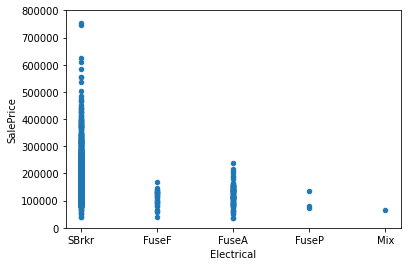

In [21]:
# Electrical  是有一个缺失值
# 先数据可视化
train_data["Electrical"]=train_data["Electrical"].fillna(train_data["Electrical"].mode()[0]) # 由可视化所以觉得应该使用mode进行填补
data = pd.concat([train_data['SalePrice'], train_data["Electrical"]], axis=1)
data.plot.scatter(x="Electrical", y='SalePrice', ylim=(0,800000));

In [22]:
#just checking that there's no missing data missing
train_data.isnull().sum().max() 

0

In [23]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [24]:
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


In [25]:
# # numerical 2 categorical
# train_data_numerical_plot = pd.melt(train_data,value_vars = numerical)
# #seaborn的FacetGrid()函数可以做出此类数据的分布和拟合曲线
# plot = sns.FacetGrid(train_data_numerical_plot,col = 'variable',col_wrap = 4,sharex = False,sharey = False)
# show_plot = plot.map(sns.distplot,'value')
# plt.show()

In [26]:
# 从上面的numerical找出可以变成categorical的
# YrSold/MoSold/GarageYrBlt/YearBuilt(这里时间序列不考虑了吗)
# train_data.groupby('YrSold').sum()
# 由打印出来的数据可知，YrSold为Categorical变量:2006,2007,2008,2009,2010
# YearRemodAdd:YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
train_data['YrSold'] = train_data['YrSold'].astype(str)
train_data['YearRemodAdd'] = train_data['YearRemodAdd'].astype(str)

In [27]:
#3.3 convert numerical variables to categorical variables
# MSSubClass: Identifies the type of dwelling involved in the sale.	
train_data = train_data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}})

In [28]:
# 将 numerical_features 转换成 categorical_features后的更新
numerical = [f for f in train_data.columns if train_data.dtypes[f] != 'object']
print("the count of numerical_features: ",len(numerical))

the count of numerical_features:  33


In [29]:
col=['Utilities','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
# 'CentralAir','SaleCondition'

In [30]:
# train_data.groupby("BsmtQual").count()
# train_data.groupby("BsmtQual").count().shape[0]

In [31]:
map_dict_col=[]
for i in col:
    ans=train_data.groupby(i).count()
    rows_num=ans.shape[0]
    map_dict={}
    for key_index in ans.index:
        map_dict[key_index]=rows_num-1
        rows_num=rows_num-1
    map_dict_single={}
    map_dict_single[i]=map_dict
    map_dict_col.append(map_dict_single)

In [32]:
map_dict_col

[{'Utilities': {'AllPub': 1, 'NoSeWa': 0}},
 {'ExterQual': {'Ex': 3, 'Fa': 2, 'Gd': 1, 'TA': 0}},
 {'ExterCond': {'Ex': 4, 'Fa': 3, 'Gd': 2, 'Po': 1, 'TA': 0}},
 {'BsmtQual': {'Ex': 4, 'Fa': 3, 'Gd': 2, 'None': 1, 'TA': 0}},
 {'BsmtCond': {'Fa': 4, 'Gd': 3, 'None': 2, 'Po': 1, 'TA': 0}},
 {'BsmtExposure': {'Av': 4, 'Gd': 3, 'Mn': 2, 'No': 1, 'None': 0}},
 {'BsmtFinType1': {'ALQ': 6,
   'BLQ': 5,
   'GLQ': 4,
   'LwQ': 3,
   'None': 2,
   'Rec': 1,
   'Unf': 0}},
 {'BsmtFinType2': {'ALQ': 6,
   'BLQ': 5,
   'GLQ': 4,
   'LwQ': 3,
   'None': 2,
   'Rec': 1,
   'Unf': 0}},
 {'HeatingQC': {'Ex': 4, 'Fa': 3, 'Gd': 2, 'Po': 1, 'TA': 0}},
 {'KitchenQual': {'Ex': 3, 'Fa': 2, 'Gd': 1, 'TA': 0}},
 {'FireplaceQu': {'Ex': 5, 'Fa': 4, 'Gd': 3, 'None': 2, 'Po': 1, 'TA': 0}},
 {'GarageQual': {'Ex': 5, 'Fa': 4, 'Gd': 3, 'None': 2, 'Po': 1, 'TA': 0}},
 {'GarageCond': {'Ex': 5, 'Fa': 4, 'Gd': 3, 'None': 2, 'Po': 1, 'TA': 0}},
 {'PoolQC': {'Ex': 3, 'Fa': 2, 'Gd': 1, 'None': 0}},
 {'Fence': {'GdPrv': 4, '

In [33]:
# 这里data_desciption还是需要改一下的
train_data=train_data.replace(
{'Utilities': {'AllPub': 1, 'NoSeWa': 0},
 'ExterQual': {'Ex': 3, 'Fa': 2, 'Gd': 1, 'TA': 0},
 'ExterCond': {'Ex': 4, 'Fa': 3, 'Gd': 2, 'Po': 1, 'TA': 0},
 'BsmtQual': {'Ex': 4, 'Fa': 3, 'Gd': 2, 'None': 1, 'TA': 0},
 'BsmtCond': {'Fa': 4, 'Gd': 3, 'None': 2, 'Po': 1, 'TA': 0},
 'BsmtExposure': {'Av': 4, 'Gd': 3, 'Mn': 2, 'No': 1, 'None': 0},
 'BsmtFinType1': {'ALQ': 6,
   'BLQ': 5,
   'GLQ': 4,
   'LwQ': 3,
   'None': 2,
   'Rec': 1,
   'Unf': 0},
 'BsmtFinType2': {'ALQ': 6,
   'BLQ': 5,
   'GLQ': 4,
   'LwQ': 3,
   'None': 2,
   'Rec': 1,
   'Unf': 0},
 'HeatingQC': {'Ex': 4, 'Fa': 3, 'Gd': 2, 'Po': 1, 'TA': 0},
 'KitchenQual': {'Ex': 3, 'Fa': 2, 'Gd': 1, 'TA': 0},
 'FireplaceQu': {'Ex': 5, 'Fa': 4, 'Gd': 3, 'None': 2, 'Po': 1, 'TA': 0},
 'GarageQual': {'Ex': 5, 'Fa': 4, 'Gd': 3, 'None': 2, 'Po': 1, 'TA': 0},
 'GarageCond': {'Ex': 5, 'Fa': 4, 'Gd': 3, 'None': 2, 'Po': 1, 'TA': 0},
 'PoolQC': {'Ex': 3, 'Fa': 2, 'Gd': 1, 'None': 0},
 'Fence': {'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0},
 'MiscFeature': {'Gar2': 4, 'None': 3, 'Othr': 2, 'Shed': 1, 'TenC': 0}})

In [34]:
train_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,SC60,RL,65.0,8450,Pave,None,Reg,Lvl,1,Inside,...,0,0,0,3,0,Feb,2008,WD,Normal,208500
2,SC20,RL,80.0,9600,Pave,None,Reg,Lvl,1,FR2,...,0,0,0,3,0,May,2007,WD,Normal,181500
3,SC60,RL,68.0,11250,Pave,None,IR1,Lvl,1,Inside,...,0,0,0,3,0,Sep,2008,WD,Normal,223500
4,SC70,RL,60.0,9550,Pave,None,IR1,Lvl,1,Corner,...,0,0,0,3,0,Feb,2006,WD,Abnorml,140000
5,SC60,RL,84.0,14260,Pave,None,IR1,Lvl,1,FR2,...,0,0,0,3,0,Dec,2008,WD,Normal,250000
6,SC50,RL,85.0,14115,Pave,None,IR1,Lvl,1,Inside,...,0,0,2,1,700,Oct,2009,WD,Normal,143000
7,SC20,RL,75.0,10084,Pave,None,Reg,Lvl,1,Inside,...,0,0,0,3,0,Aug,2007,WD,Normal,307000
8,SC60,RL,80.0,10382,Pave,None,IR1,Lvl,1,Corner,...,0,0,0,1,350,Nov,2009,WD,Normal,200000
9,SC50,RM,51.0,6120,Pave,None,Reg,Lvl,1,Inside,...,0,0,0,3,0,Apr,2008,WD,Abnorml,129900


In [35]:
# log_transformation
# 在log_transformation之前还需要更新 numerical_features 和categorical_features
test_normal_or_not = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train_data[numerical])
normal = normal.apply(test_normal_or_not)
print(not normal.any())  # 打印结果是False
# 说明数值型特征也没有一个符合正态分布，所以也需要相应地选择对他们进行变换

False
